# Exploring and Analyzing Text Data Assignment 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import spacy
import string
import pandas as pd
from nltk import pos_tag
from nltk.text import Text
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

!python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [3]:
#import nltk
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('averaged_perceptron_tagger')

### Read the CNN Lite plain text file articles into a corpus using the NLTK's PlaintextCorpusReader.

In [4]:
PATH = '/content/drive/MyDrive/python_for_data_scientists/cnn_lite'
DOC_PATTERN = r'.*\.txt'
cnn = PlaintextCorpusReader(PATH , DOC_PATTERN)

### Iterate through the fileids in the corpus, extract the raw text of each document, and store them in a list.

In [5]:
docs = [cnn.raw(fileid) for fileid in cnn.fileids()]

### Write a function that calculates the following statistics for a document and returns them as a list.

- Number of sentences
- Number of tokens
- Number of words (no stop words or punctuation)
- Number of unique words (vocabulary)
- Number of unique named entities (excluding numbers, dates, times, and currency types)
- Average sentence length
- Average word length
- Lexical diversity

In [6]:
def text_stats(doc):
  sents = sent_tokenize(doc)
  tokens = word_tokenize(doc)
  words = [token.lower() for token in tokens if not token.lower() in stopwords.words('english') if not token in string.punctuation]
  num_sents = len(sents)
  num_tokens = len(tokens)
  num_words = len(words)
  vocab = len(set(words))
  characters = sum([len(word) for word in words])

  spacy_doc = nlp(doc)
  filter = ['PERSON','NORP','FAC','ORG','GPE','LOC','PRODUCT','EVENT','WORK_OF_ART','LAW','LANGUAGE']
  entities = [entity.text for entity in spacy_doc.ents if entity.label_ in filter]
  num_entities = len(set(entities))
  
  words_per_sent = num_words / num_sents
  char_per_word = characters / num_words
  lex_div = vocab / num_words

  stats = [num_sents, num_tokens, num_words, vocab, num_entities, words_per_sent, char_per_word, lex_div]
  return stats


### Iterate through all the documents, calculate these statistics for each one, and store all the results in a Pandas data frame.

In [7]:
doc_stats = [text_stats(doc) for doc in docs]

In [8]:
doc_stats_df = pd.DataFrame(doc_stats)
doc_stats_df.columns = ['Sentences','Tokens','Words','Vocab','Entities','Avg. Sentence','Avg. Word','Lexical Diversity']

In [9]:
doc_stats_df.head()

,Sentences,Tokens,Words,Vocab,Entities,Avg. Sentence,Avg. Word,Lexical Diversity
0,75,1654,830,538,45,11.066667,5.913253,0.648193
1,20,469,262,179,25,13.100000,6.248092,0.683206
2,262,4573,2126,1124,91,8.114504,5.942615,0.528692
3,28,803,454,255,33,16.214286,6.011013,0.561674
4,34,620,316,204,16,9.294118,5.924051,0.645570


### Summarize these statistics for the entire corpus by calling the Pandas `describe` method.

In [10]:
doc_stats_df.describe()

,Sentences,Tokens,Words,Vocab,Entities,Avg. Sentence,Avg. Word,Lexical Diversity
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,51.385965,1025.192982,542.087719,313.614035,36.122807,11.088300,6.009093,0.671872
std,69.758961,1217.950114,631.513468,259.973608,38.035730,2.439322,0.405653,0.106225
min,4.000000,30.000000,19.000000,18.000000,4.000000,4.750000,5.131579,0.351988
25%,18.000000,372.000000,197.000000,140.000000,15.000000,9.500000,5.736842,0.618750
50%,26.000000,585.000000,320.000000,209.000000,25.000000,10.615385,6.046366,0.667925
75%,63.000000,1297.000000,717.000000,429.000000,45.000000,12.887097,6.315447,0.730263
max,423.000000,7635.000000,3949.000000,1390.000000,238.000000,16.708333,6.827086,0.947368


### Choose a document from the list of documents you created earlier and generate a frequency distribution bar chart for it showing which terms appear most frequently in the text.

In [11]:
doc = docs[35]
cleaned = [token.lower() for token in word_tokenize(doc) if not token.lower() in stopwords.words('english') if token.isalpha()]

In [12]:
fdist = FreqDist(cleaned)
fdist_df = pd.DataFrame.from_dict(fdist, orient='index').reset_index()
fdist_df.columns = ['Word','Count']
ordered = fdist_df.sort_values('Count', ascending=False)
filtered = ordered[ordered['Count'] > 1]

Text(0.5, 1.0, 'Word Count Distribution \n')

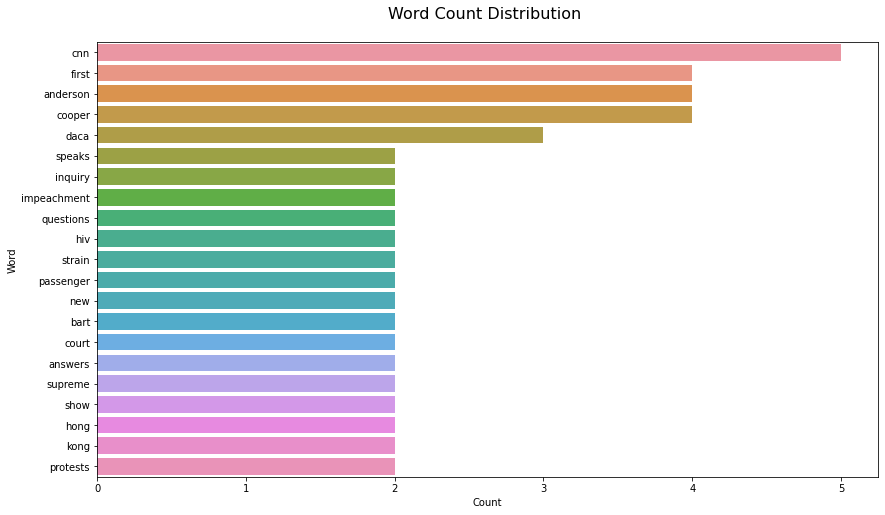

In [13]:
plt.figure(figsize=(14,8))
sns.barplot(data=filtered, x='Count', y='Word')
plt.title('Word Count Distribution \n', fontsize=16)

### Generate a word cloud visualization for the same document for which you generated the frequency distribution.

In [14]:
def word_cloud(doc, colormap='tab10', background_color='white'):
  cloud = WordCloud(width=1600, height=800, stopwords=STOPWORDS, colormap=colormap, background_color=background_color).generate(doc)

  plt.figure(figsize=(12,10))
  plt.imshow(cloud)
  plt.axis('off')
  plt.tight_layout(pad=0)
  plt.show()

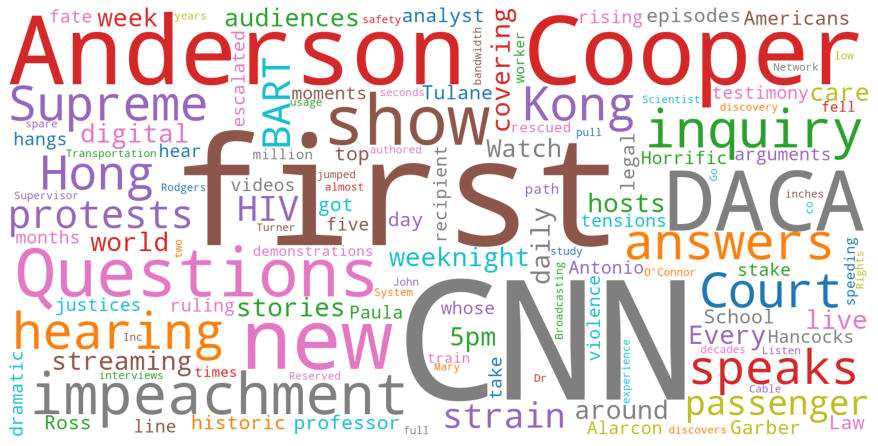

In [15]:
word_cloud(doc)

### Choose a different article (preferably one that references several named entities) and create a dispersion plot that shows the occurrence of those entities throughout the document.

In [16]:
doc_ = docs[3]

In [17]:
spacy_doc = nlp(doc_) 

In [18]:
filter = ['PERSON']

In [19]:
entities = [entity.text for entity in spacy_doc.ents if entity.label_ in filter]

In [20]:
entities = list(set(entities))

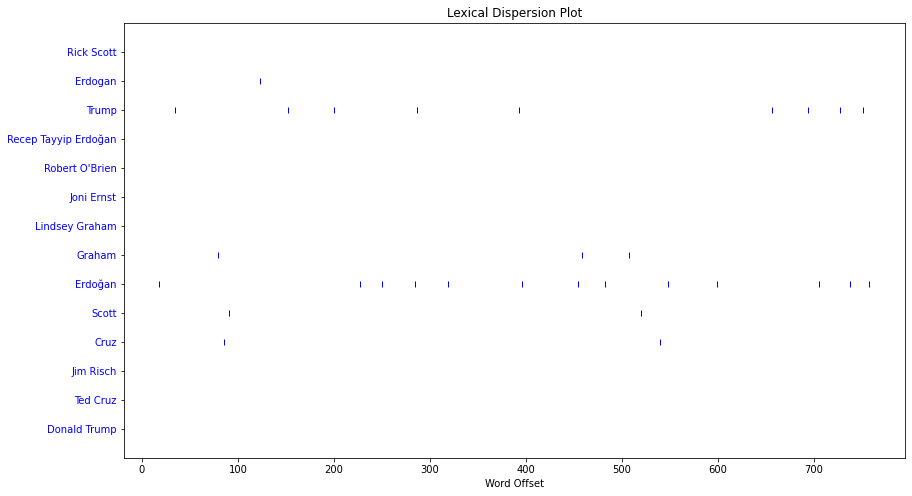

In [21]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8

tokenized = word_tokenize(doc_)
figures = entities

Text(tokenized).dispersion_plot(figures)

### Choose another article and generate a POS visualization highlighting the parts of speech for tokens in the article.

In [22]:
from yellowbrick.text.postag import PosTagVisualizer

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [23]:
_doc_ = docs[26]
tokens = word_tokenize(_doc_)
tagged = pos_tag(tokens)

visualizer = PosTagVisualizer()
visualizer.transform(tagged)

print(' '.join((visualizer.colorize(token, color) for color, token in visualizer.tagged)))
print('\n')


( CNN ) - Alicia Keys is hosting the Grammy Awards again next year . Her 2020 return for the 62nd Annual Grammys puts her in rare company after she became the first female to host the Awards in 14 years . Before that , the last woman was Queen Latifah in 2005 . `` At first , I did think last year was a one-time thing , but when the opportunity came back around , there was no question about returning as host , '' Keys told Billboard in a statement . `` Last year was such a powerful experience for me . Not only did I feel the love in the room , but I felt it from around the world and it confirmed the healing and unifying power of music . '' Next year 's awards will take take place on January 26 at the Staples Center in Los Angeles . This year , she said her status as a regular award receiver helped with her hosting duties . `` I know what it feels like to be on that stage , and I 'm going to bring that vibe and energy , '' Keys said . On Wednesday Keys had some fun with the announcement 